In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
ks = range(1,10)
SSE = []

for k in ks:
    model = KMeans(n_clusters=k, algorithm='auto')
    model.fit(feature)
    SSE.append(model.inertia_)
    
SSE

[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 28.034982153246226,
 21.00466066066067,
 17.407016343591845,
 14.818592485856552,
 12.959129713423833,
 11.18570282495283]

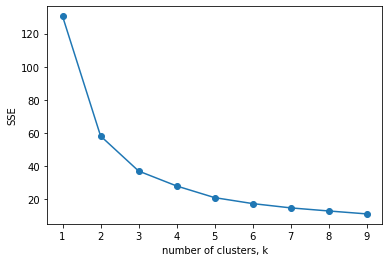

In [5]:
plt.plot(ks, SSE, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [9]:
model1 = KMeans(n_clusters=3,algorithm='auto')
model1.fit(feature)
predict = pd.DataFrame(model1.predict(feature))
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1)
print(r)

     Sepal length  Sepal width  predict
0             5.1          3.5        2
1             4.9          3.0        2
2             4.7          3.2        2
3             4.6          3.1        2
4             5.0          3.6        2
..            ...          ...      ...
145           6.7          3.0        1
146           6.3          2.5        0
147           6.5          3.0        1
148           6.2          3.4        1
149           5.9          3.0        0

[150 rows x 3 columns]


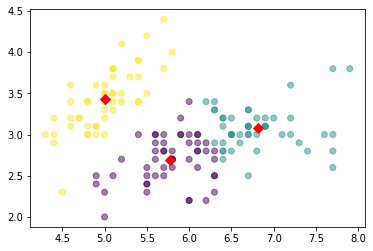

In [11]:
centers = pd.DataFrame(model1.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [12]:
ct=pd.crosstab(data['labels'],r['predict'])
print(ct)

predict   0   1   2
labels             
0         0   0  50
1        38  12   0
2        15  35   0
